# Upper Confidence Bound (UCB)

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')


## Implementing UCB

In [4]:
import math
N = 10000
d = 10
ads_selected = []
number_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_ucb = 0
  for i in range(0,d):
    if number_of_selections[i] > 0:
      avg_reward = sums_of_rewards[i] / number_of_selections[i]
      delta_i = math.sqrt(3 * math.log(n+1)/(2*number_of_selections[i]))
      ucb = avg_reward + delta_i
    else:
      ucb = 1e400
    if ucb > max_ucb:
      max_ucb = ucb
      ad = i 
  ads_selected.append(ad)
  number_of_selections[ad] +=1
  reward = dataset.values[n,ad]
  sums_of_rewards[ad] += reward
  total_reward += reward


## Visualising the results

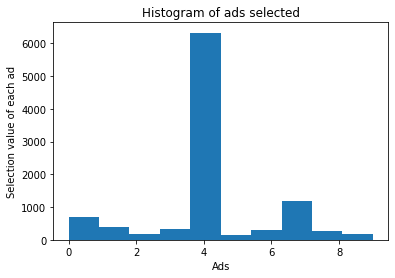

In [5]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel('Ads')
plt.ylabel('Selection value of each ad')
plt.show()